**PRCP-1000-PortugeseBank**


**Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make  customers  buy the product.

# **Task 1: Data Analysis Report**
**1. Data Overview**

Step 1.1: Load the Dataset with appropiate headings

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define the column headers
columns = ["age", "job", "marital", "education", "default", "housing", "loan", "contact",
           "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
           "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]

# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv", delimiter=';', names=columns, header=0)

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Step 1.2: Summary Statistics

Getting the summary statistics of the dataset:

In [2]:
# Display the summary statistics of the dataset
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


# **2. Data Cleaning**
Step 2.1: Handling Missing Values

Replace 'unknown' with NaN for handling missing values:

In [3]:
# Replace 'unknown' with NaN for handling missing values

data.replace('unknown', pd.NA, inplace=True)

# Check for missing values
missing_values = data.isna().sum()
missing_values


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Step 2.2: Imputation or Removal Strategies

Based on the extent of missing values, we will decide on imputation or removal strategies. For simplicity, let's drop rows with missing values:



In [4]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Verify that there are no missing values left
data_cleaned.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# **3. Exploratory Data Analysis (EDA)**
Step 3.1: Univariate Analysis

Distribution of numeric features:

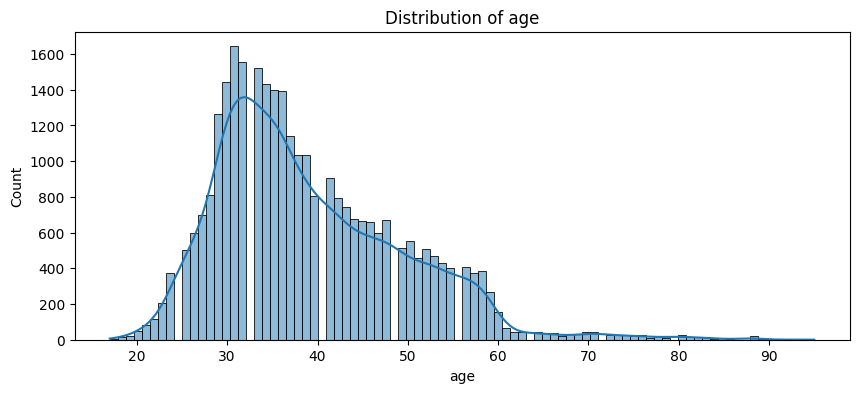

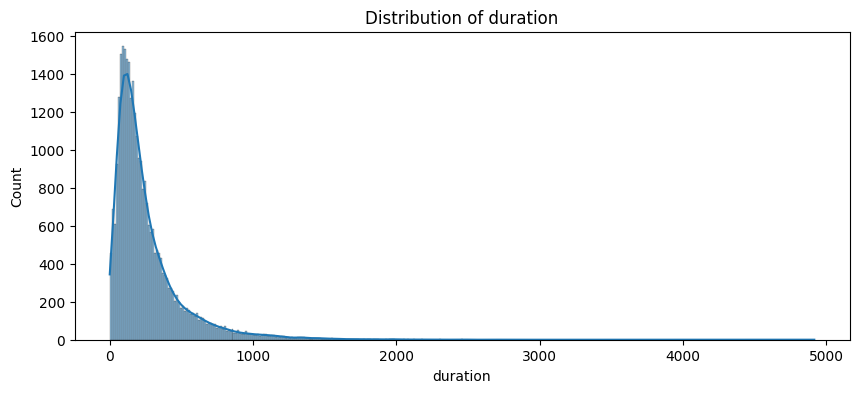

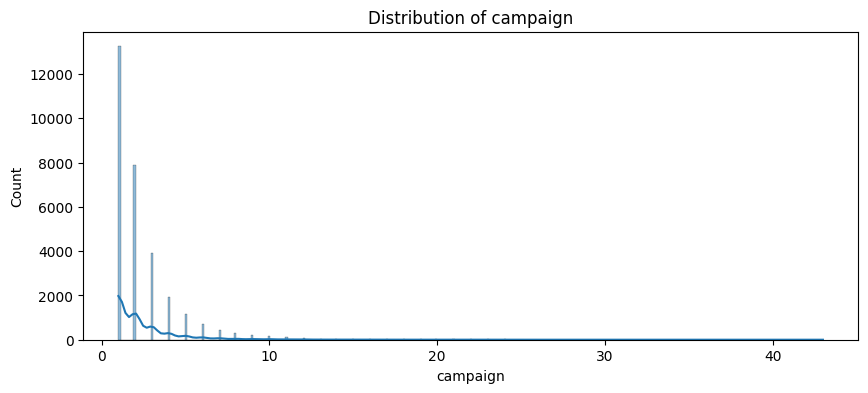

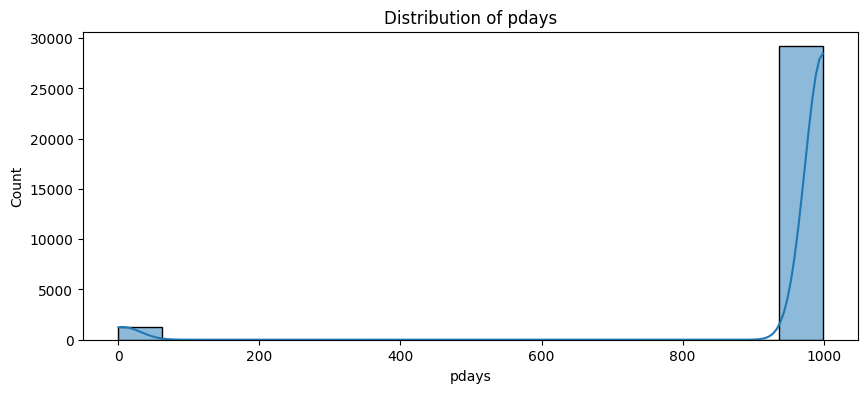

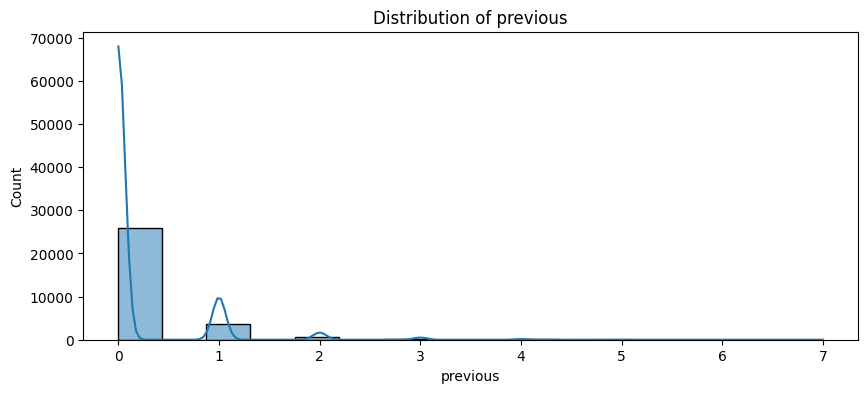

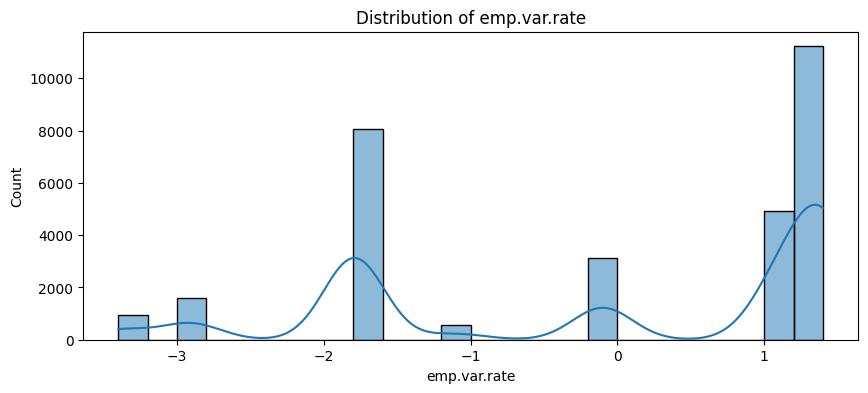

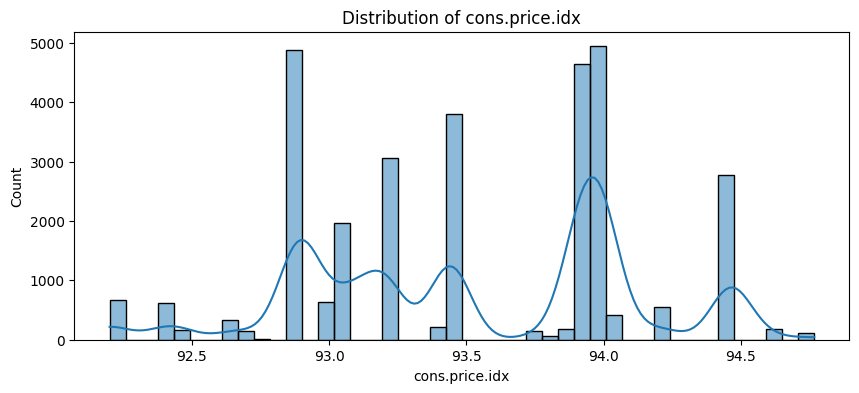

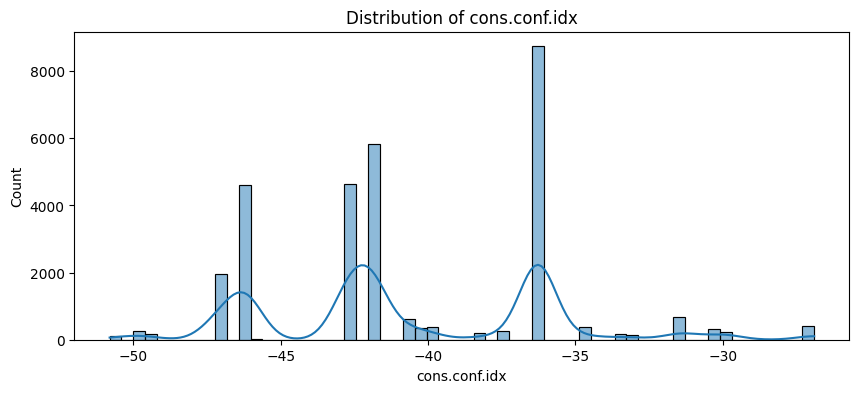

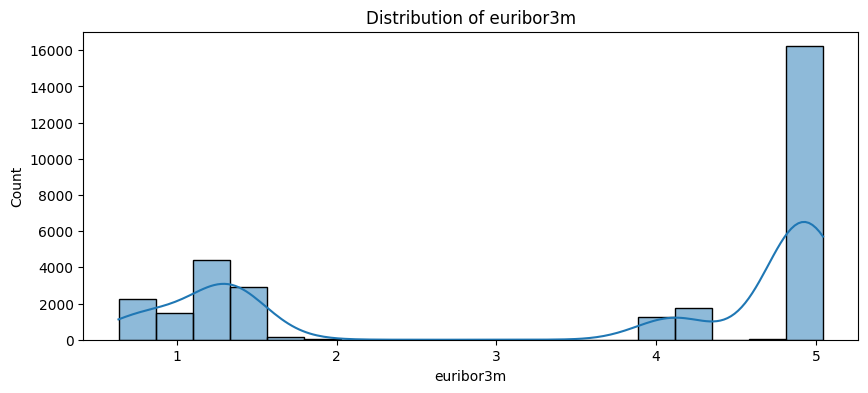

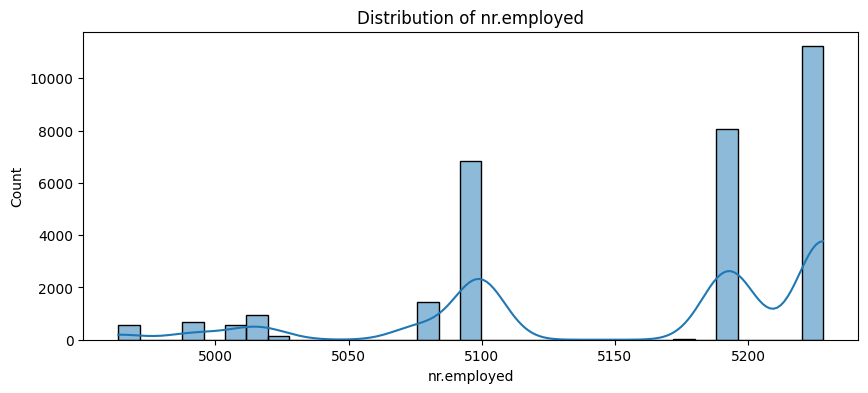

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data_cleaned[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Distribution of categorical features:

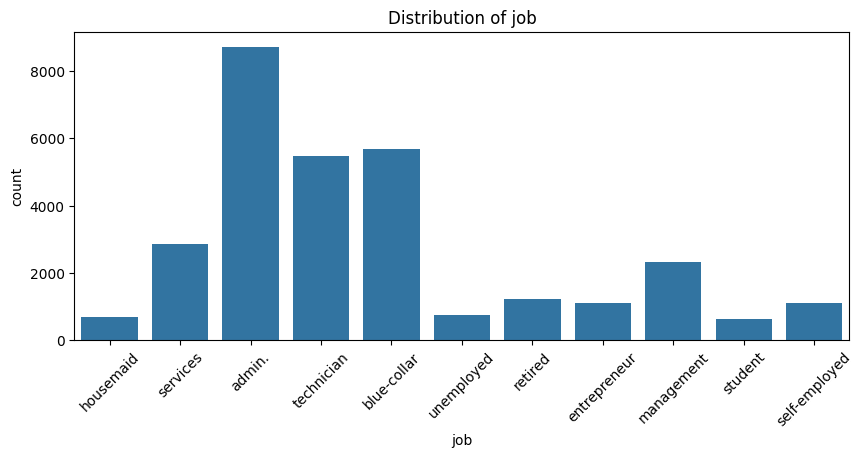

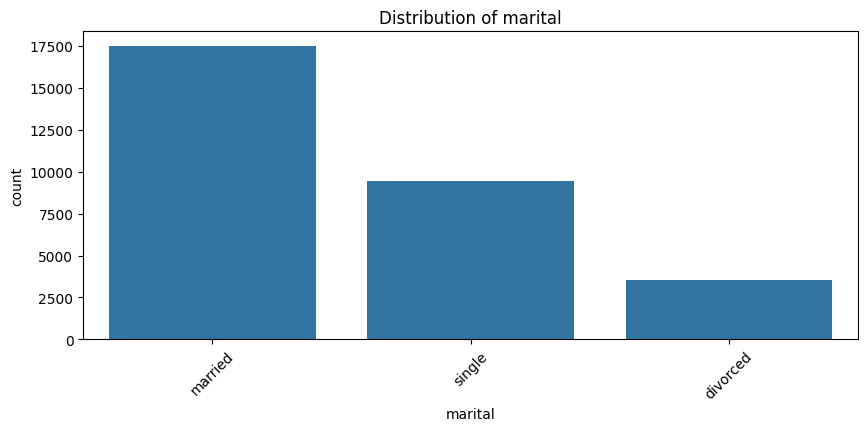

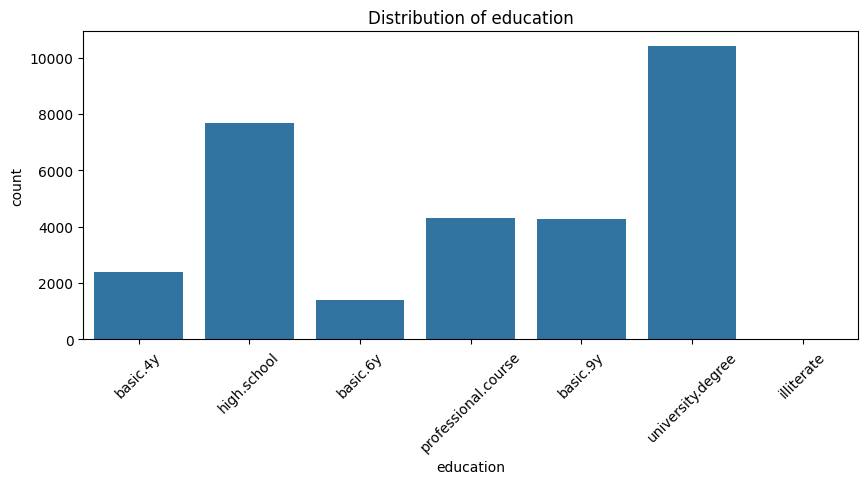

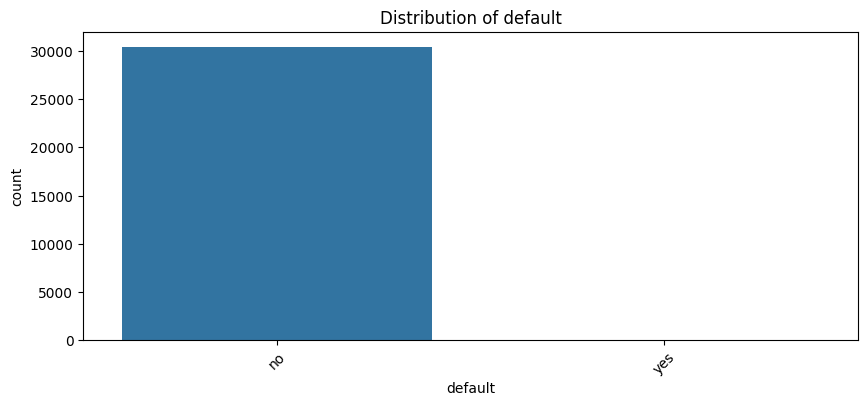

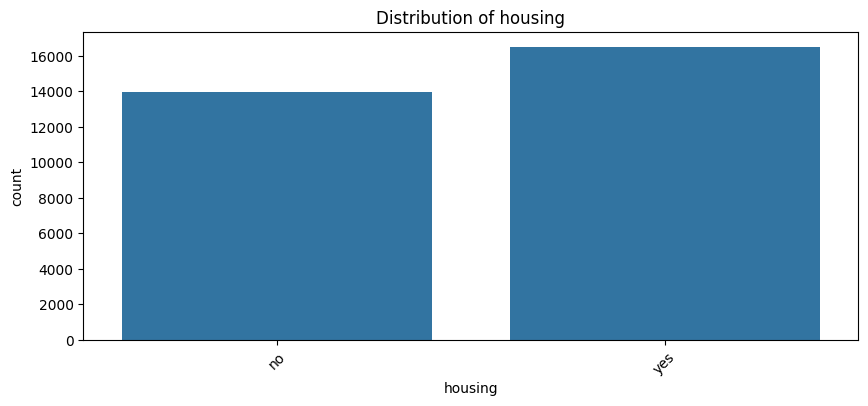

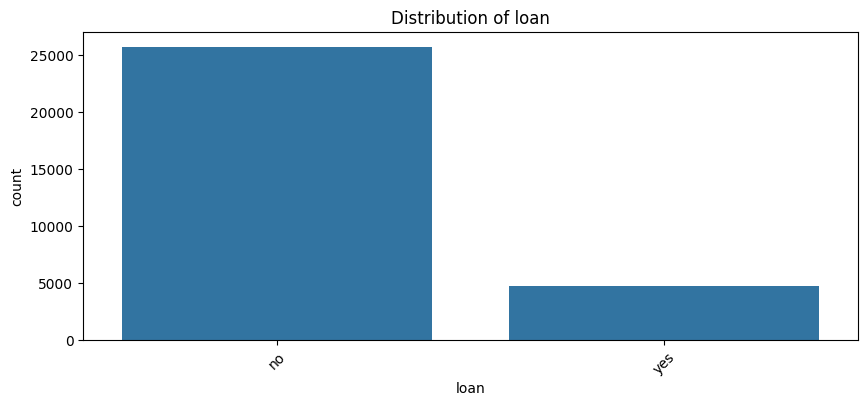

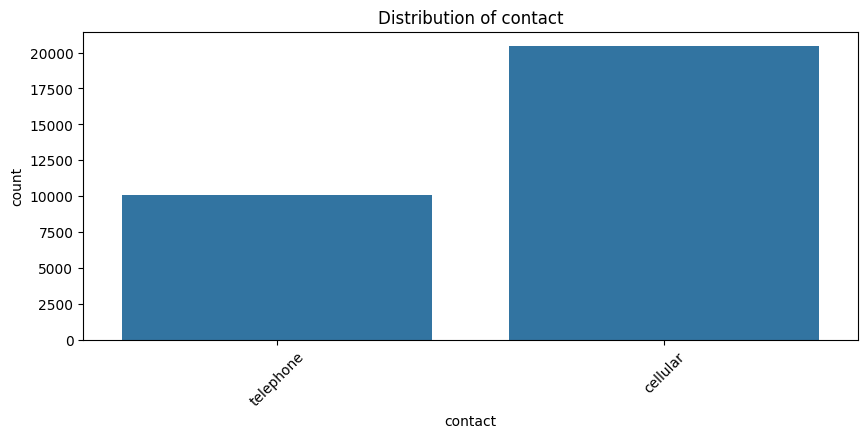

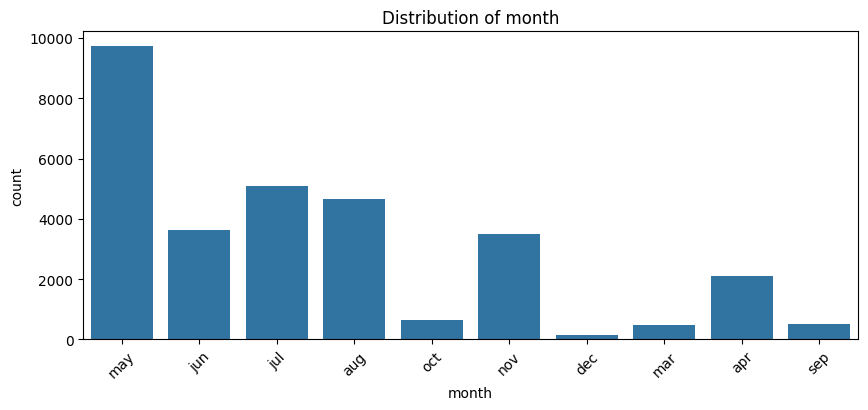

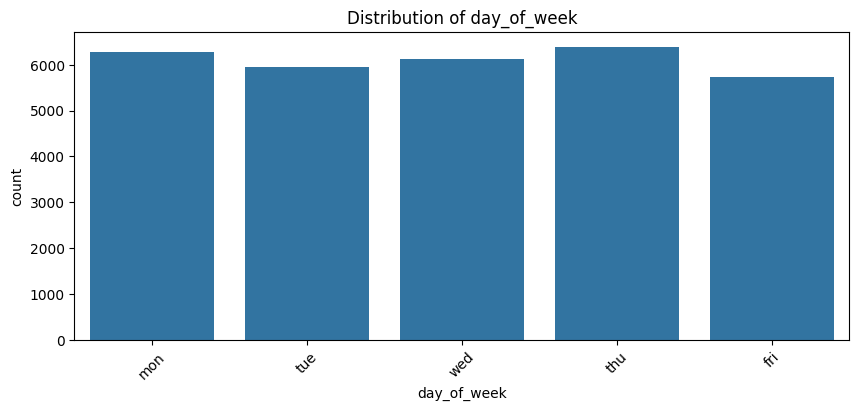

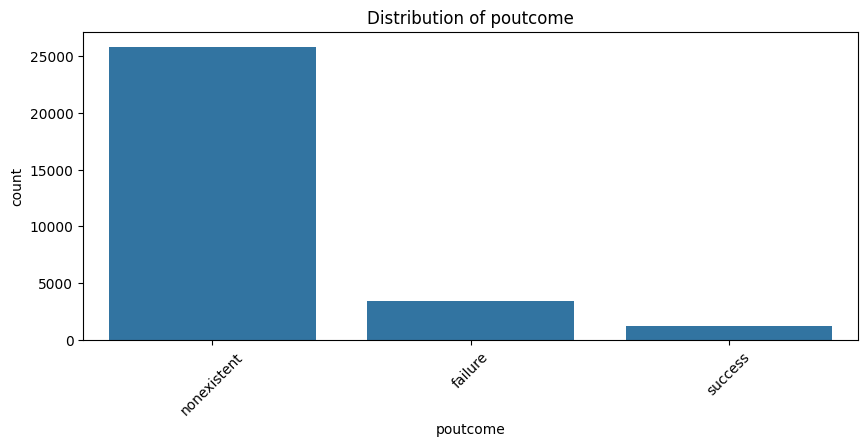

In [6]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data_cleaned[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Step 3.2: Bivariate Analysis

Relationship between input features and target variable 'y':

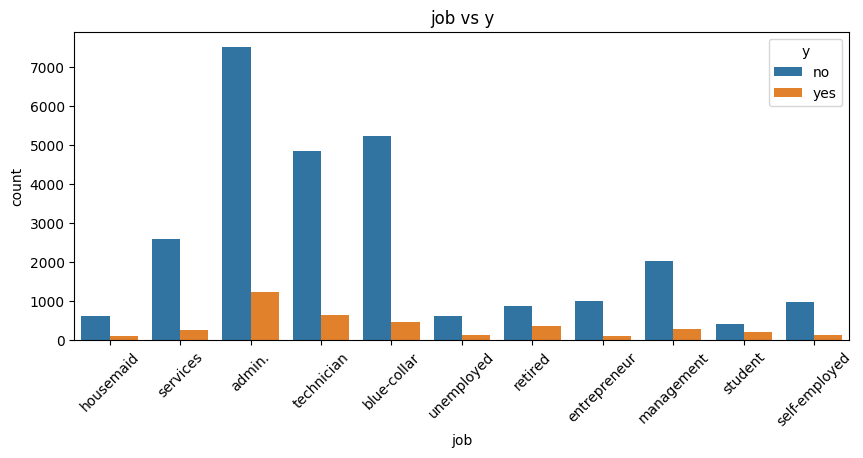

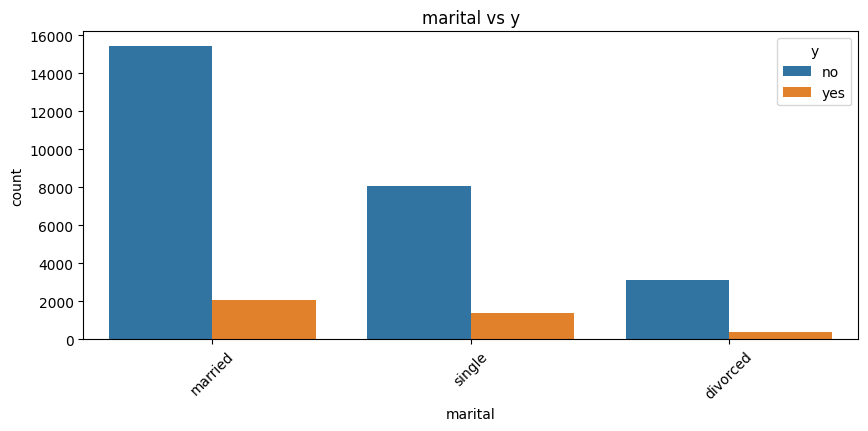

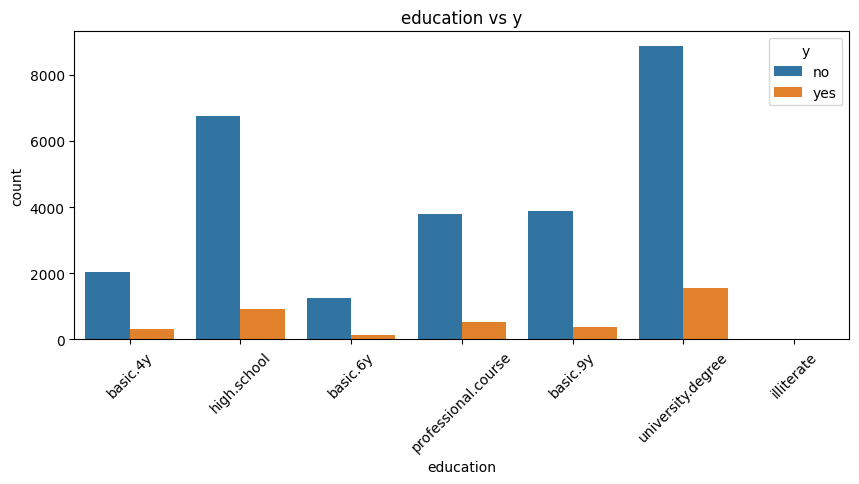

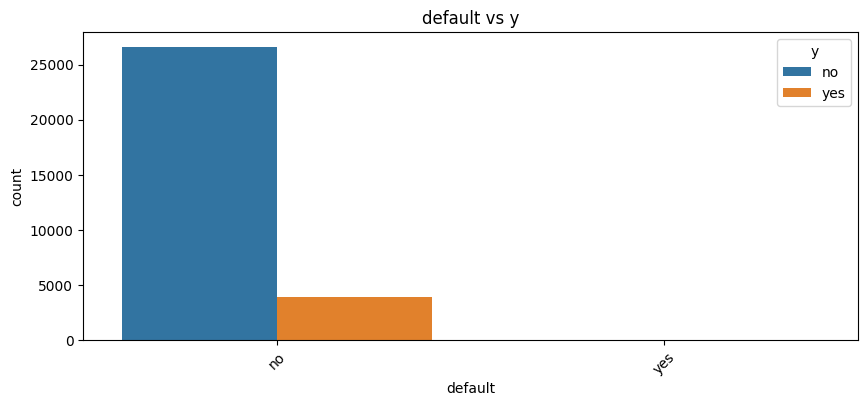

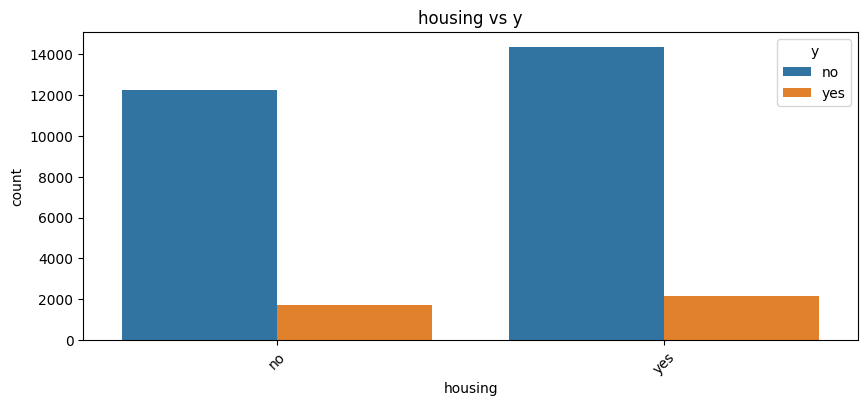

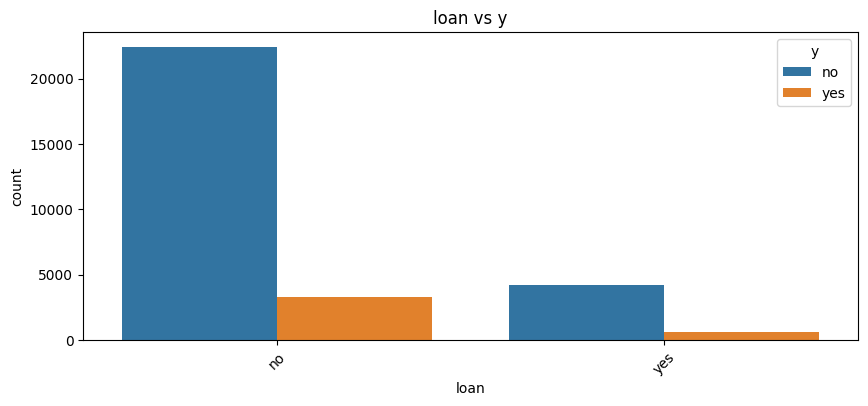

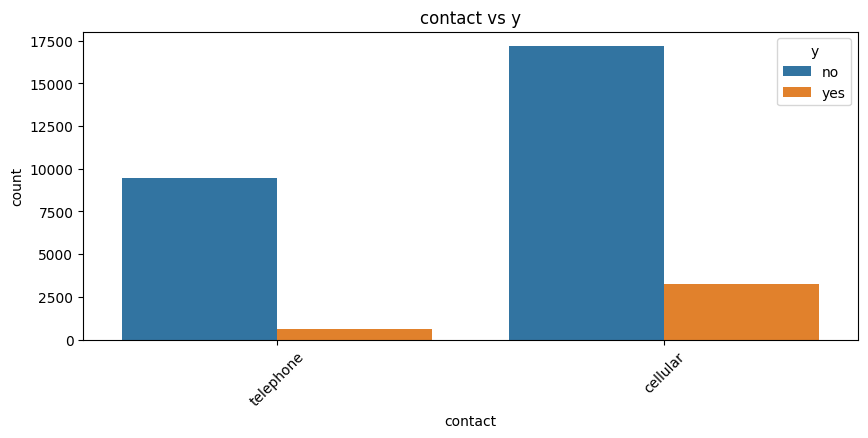

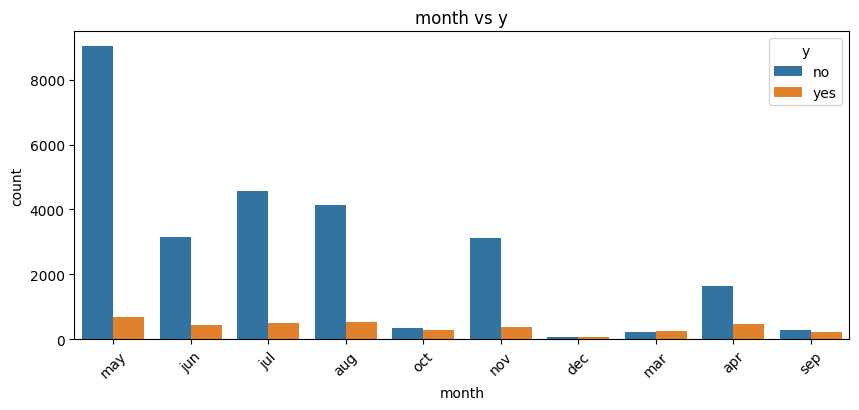

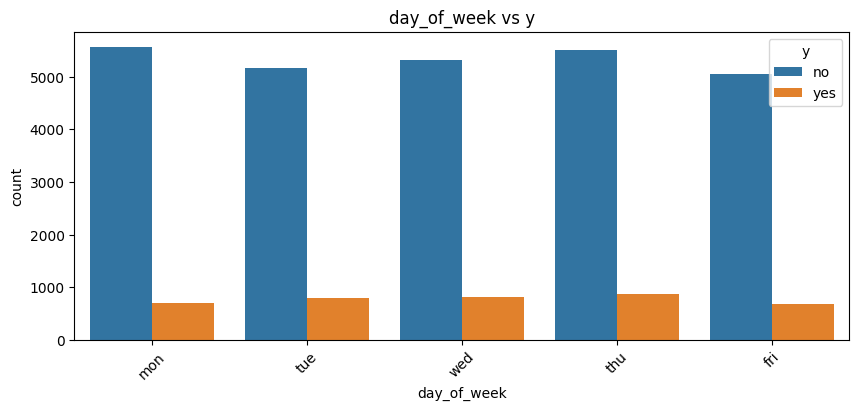

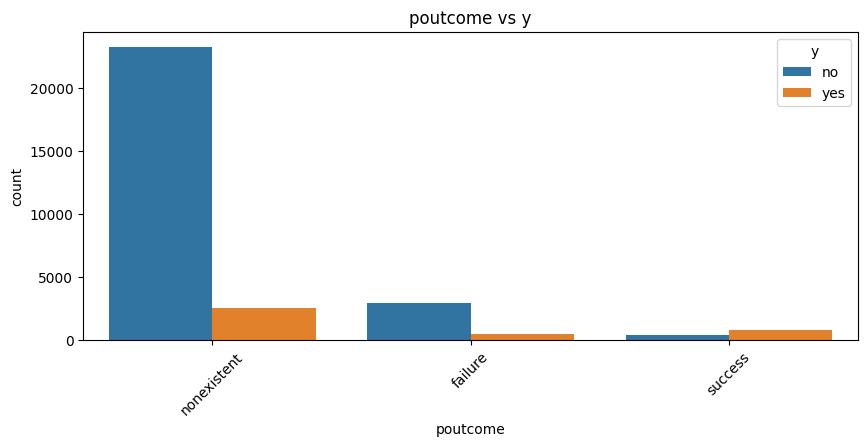

In [7]:
# Plot relationships between categorical features and the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data_cleaned[feature], hue=data_cleaned['y'])
    plt.title(f'{feature} vs y')
    plt.xticks(rotation=45)
    plt.show()

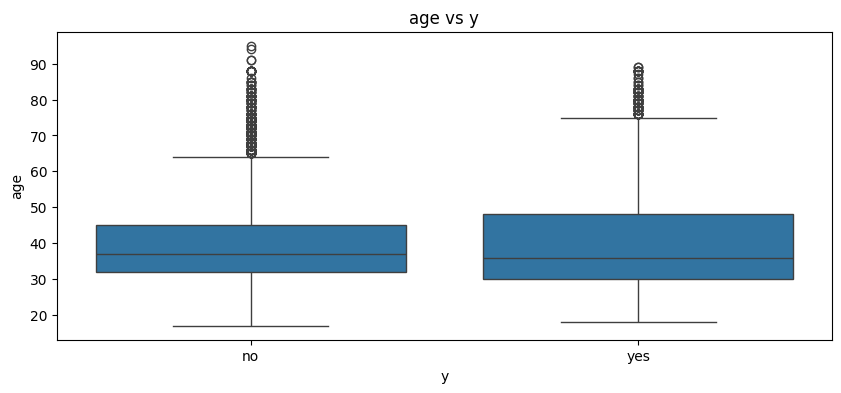

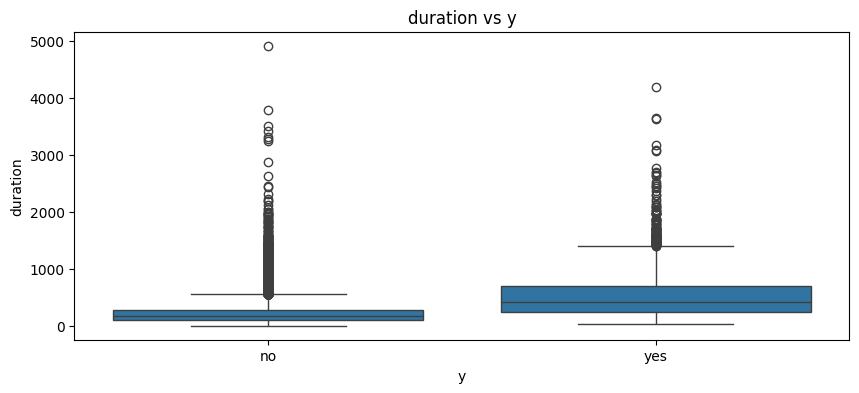

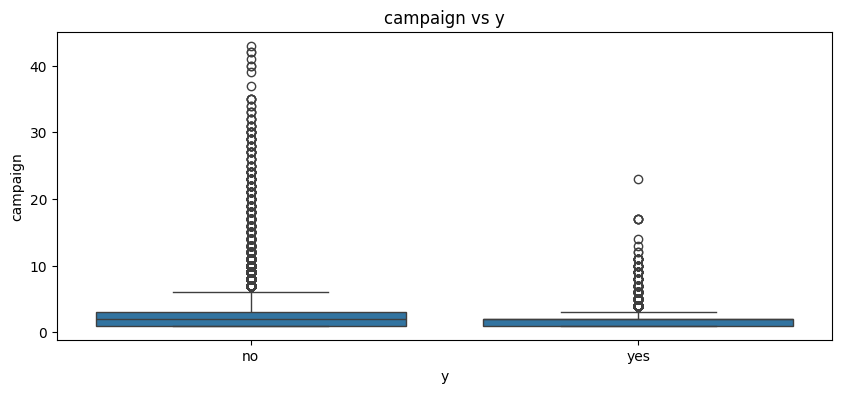

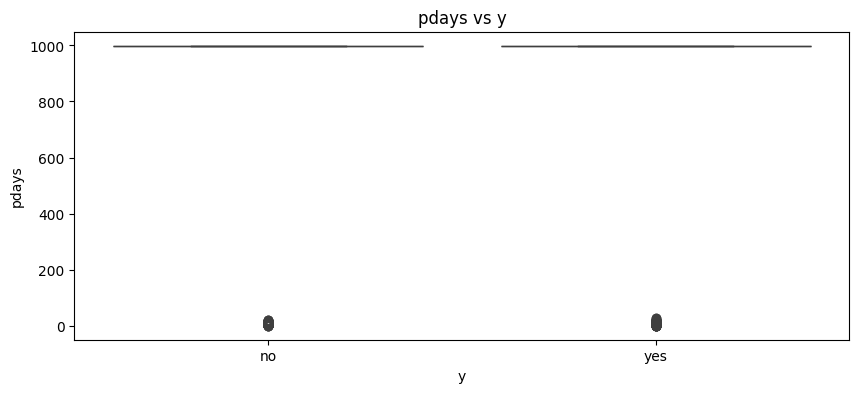

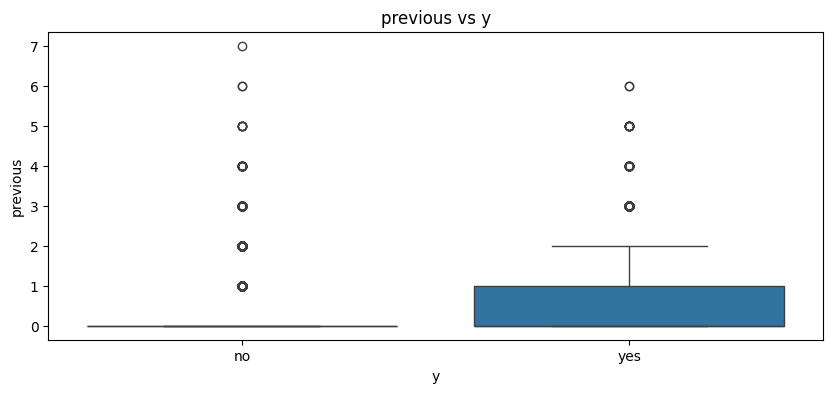

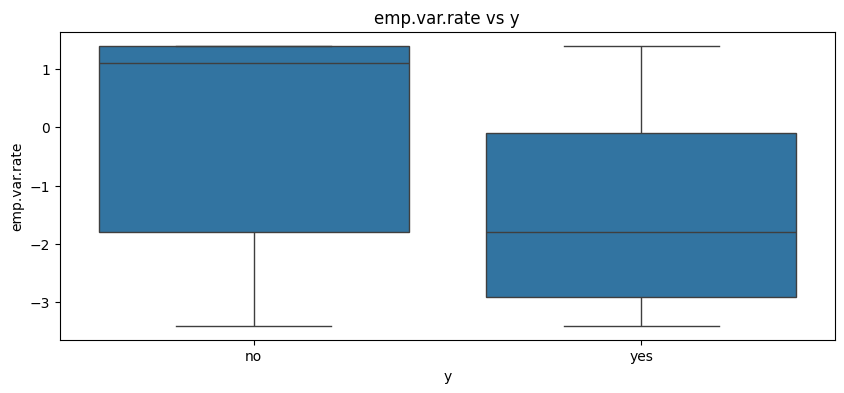

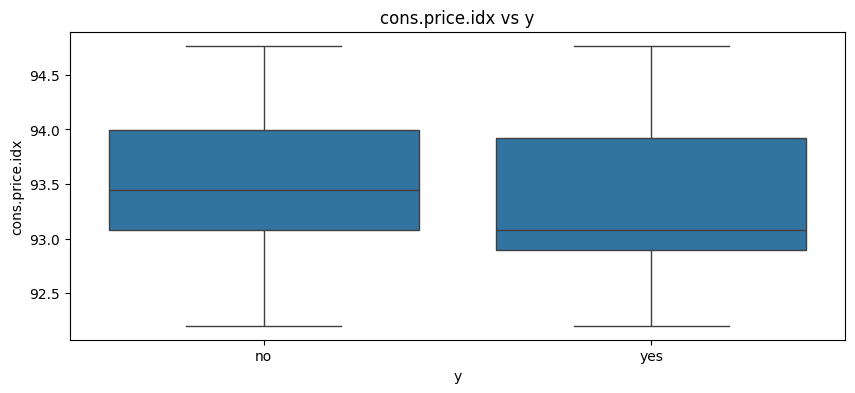

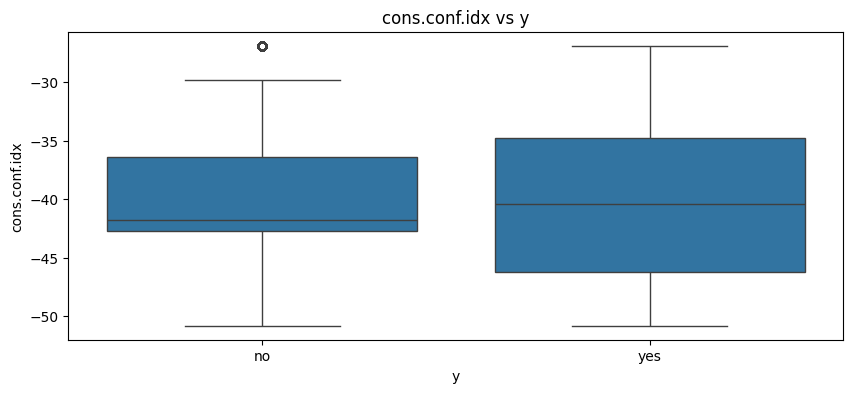

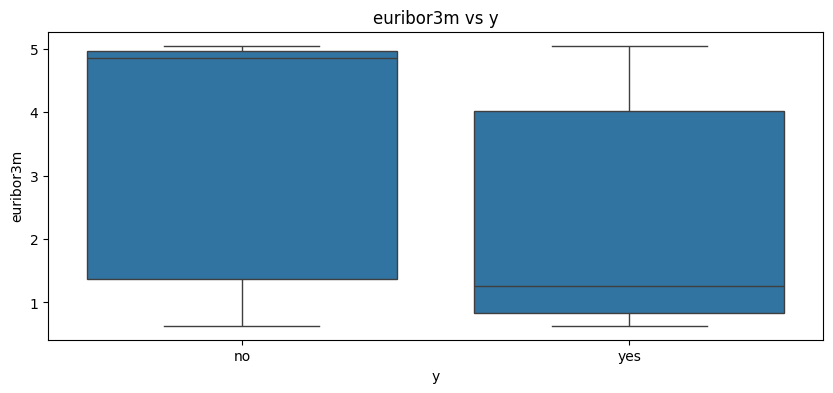

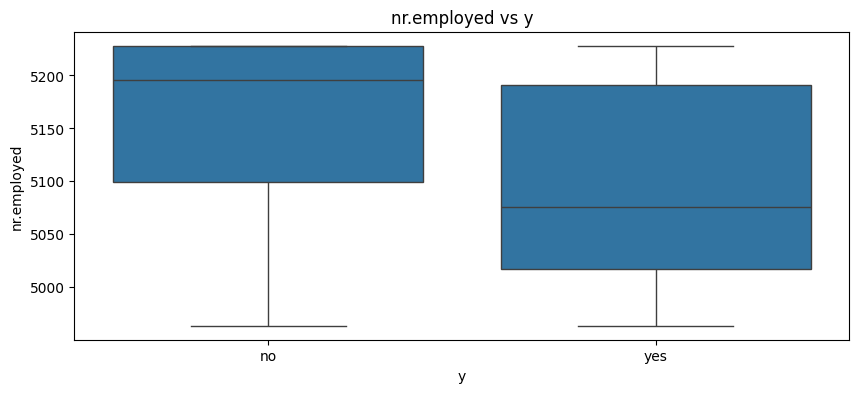

In [8]:
# Plot relationships between numeric features and the target variable
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_cleaned['y'], y=data_cleaned[feature])
    plt.title(f'{feature} vs y')
    plt.show()

Step 3.3: Multivariate Analysis

Pairplots

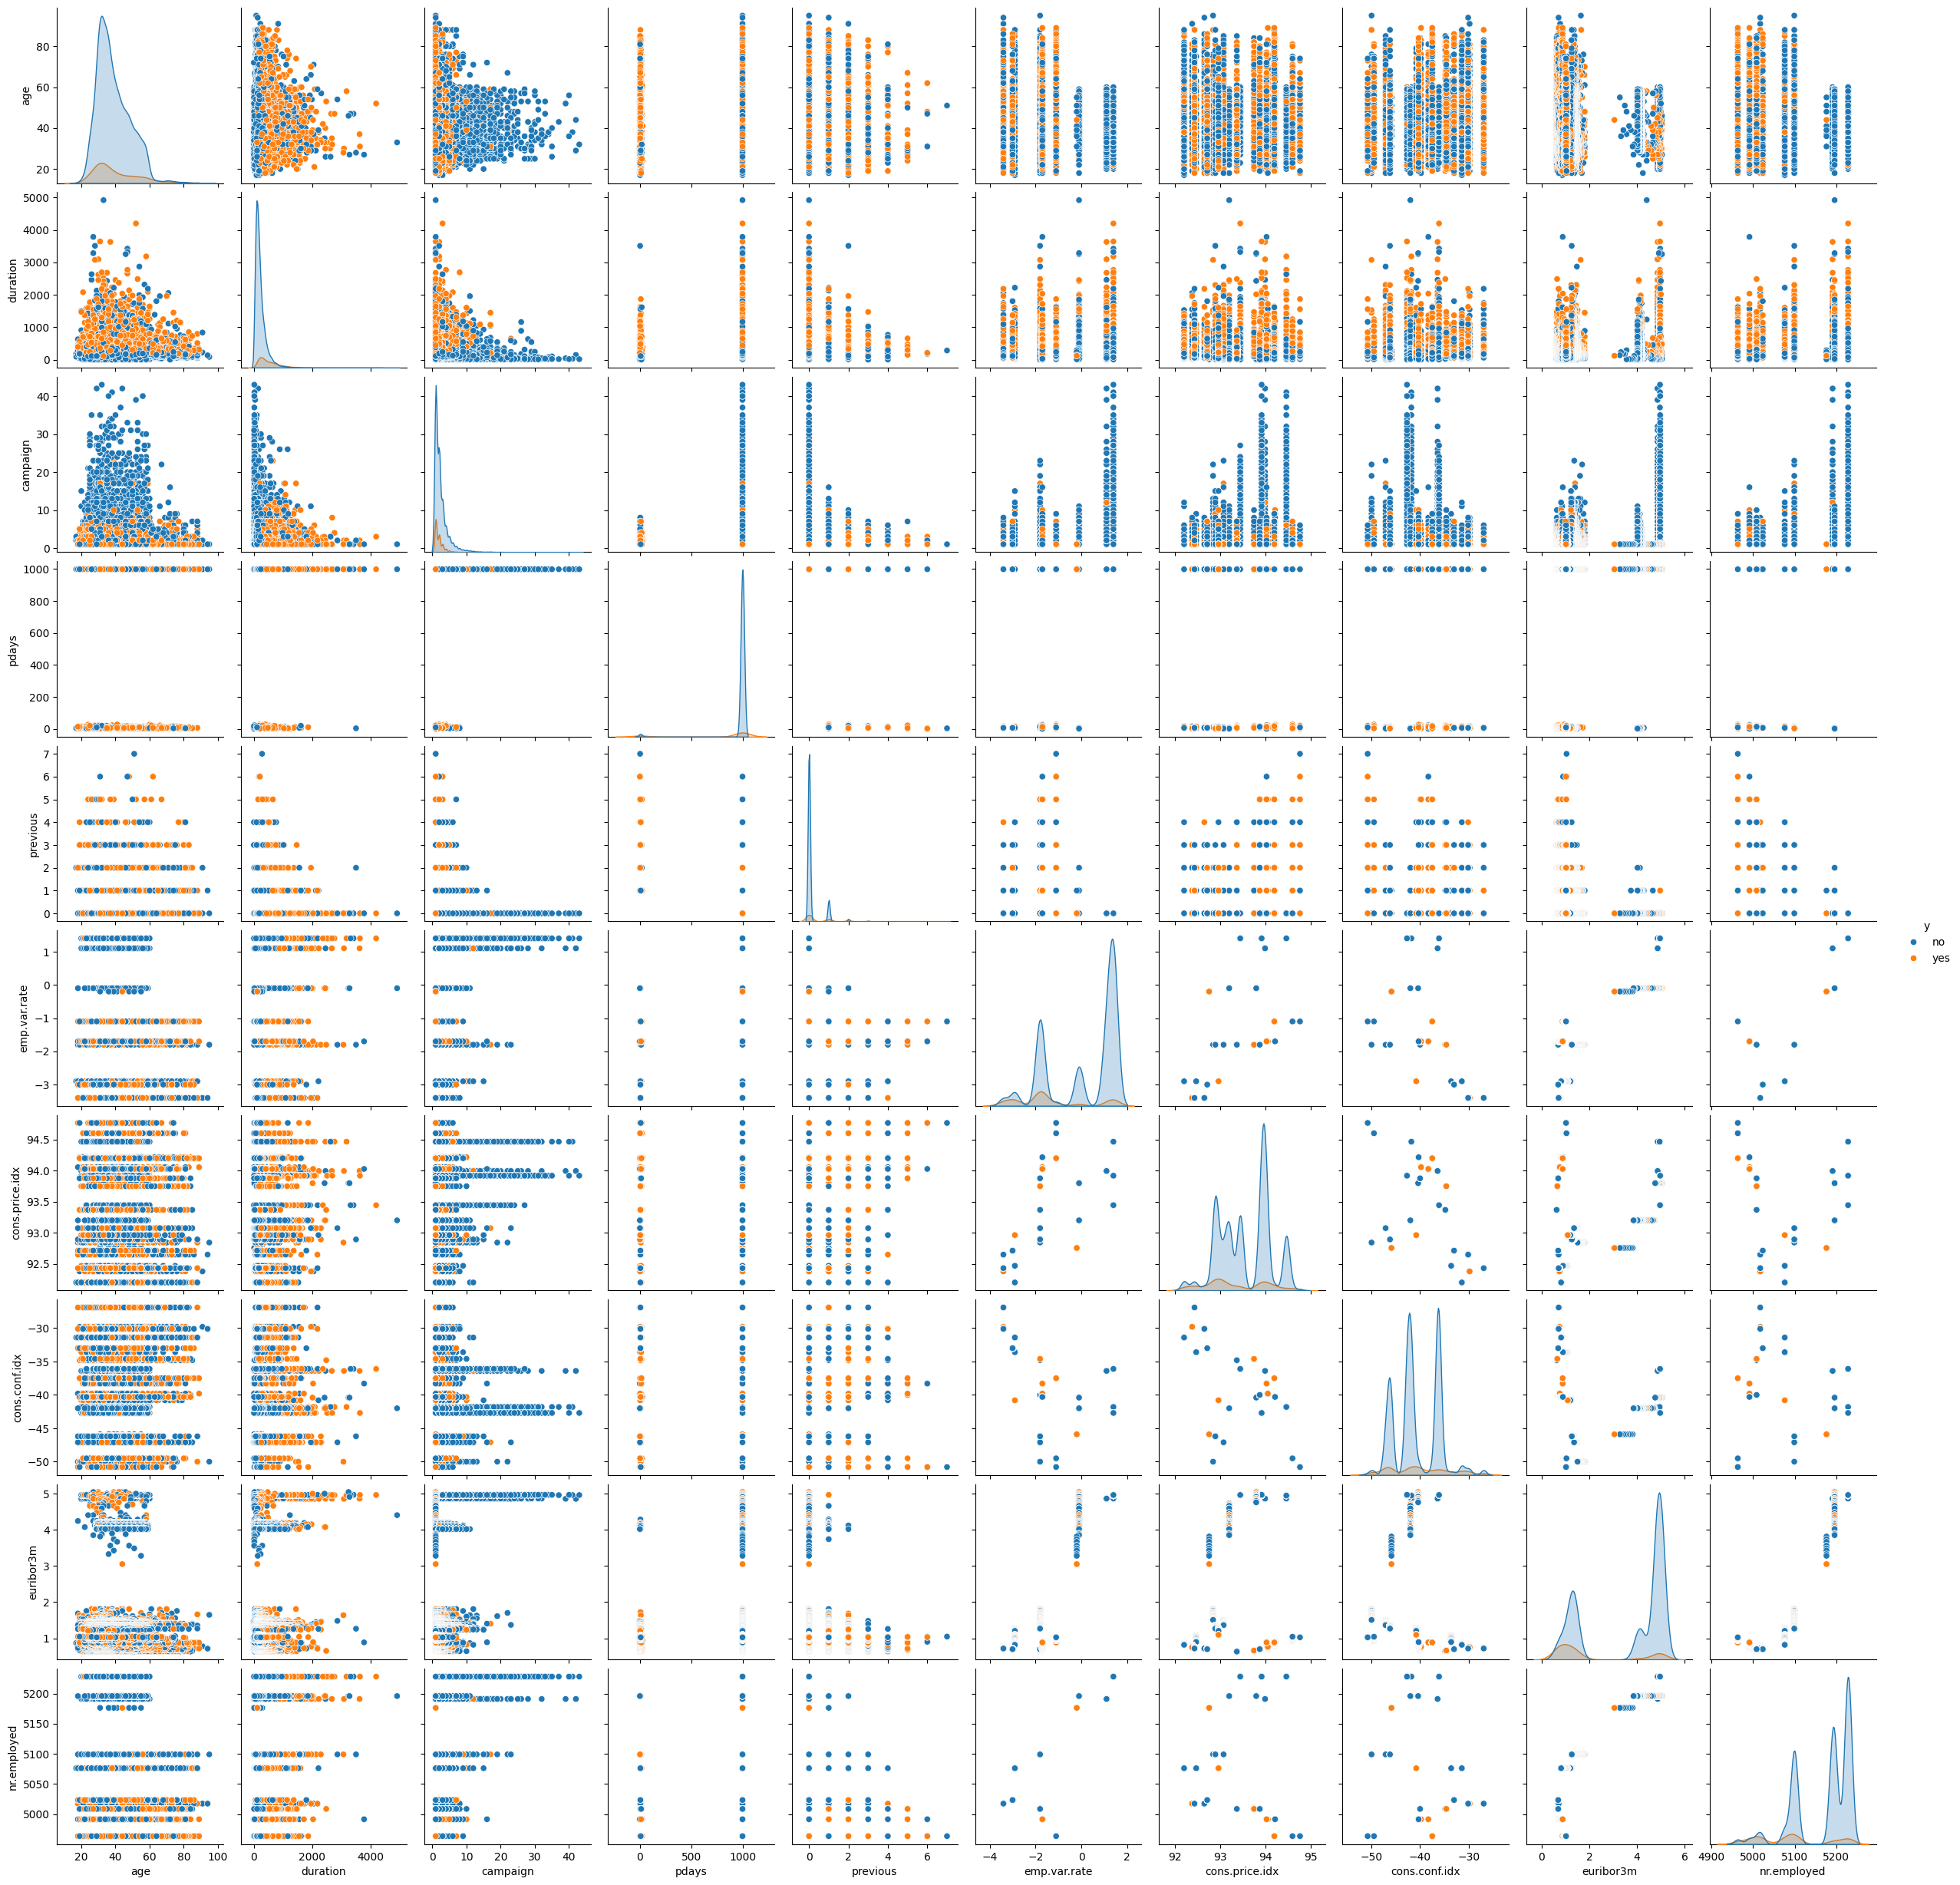

In [9]:
# Pairplot of selected features
sns.pairplot(data_cleaned[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']], hue='y')
plt.show()

# **4. Correlation Analysis**

Understanding the correlation between numeric features and the target variable.

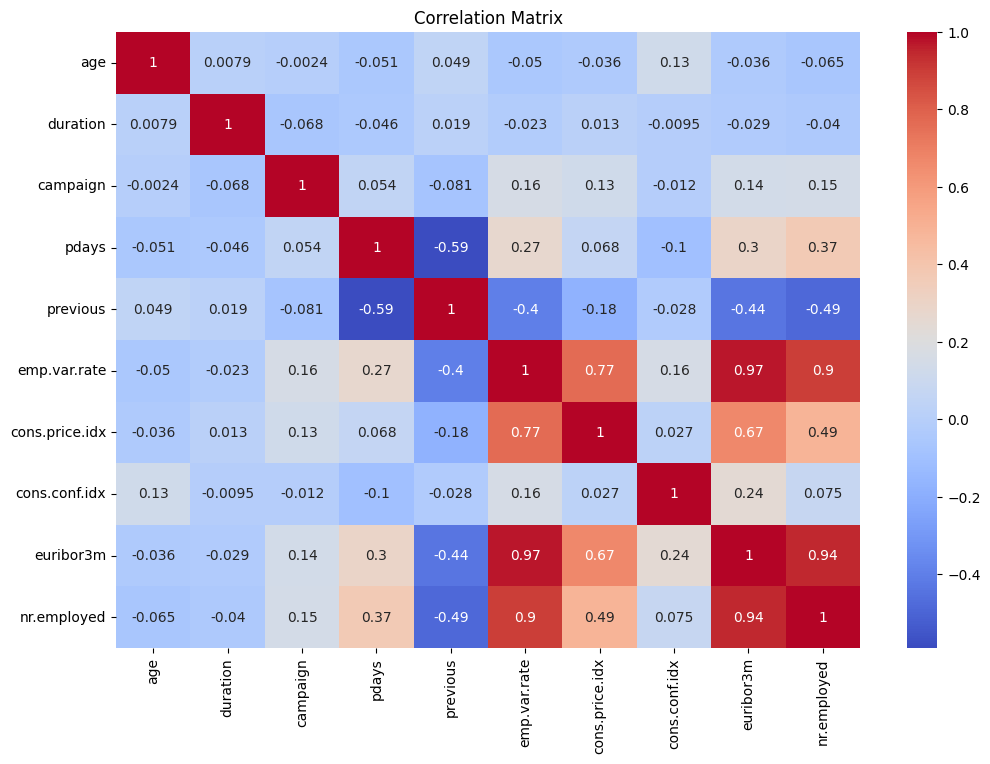

In [10]:
# Correlation matrix using only numeric features
numeric_data = data_cleaned[numeric_features]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# **Task 2: Creating a Predictive Model**
The goal is to create a predictive model to help the bank marketing team identify which customers are likely to subscribe to a term deposit.



Step 1: Encoding Categorical Variables
Convert categorical variables into numerical representations using OneHotEncoder:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assume 'y' is the target variable indicating if a customer bought the product (1) or not (0)
X = data_cleaned.drop(columns=['y'])  # Features
y = data_cleaned['y']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


**2. Preprocessing and Model Building for Each Algorithm**

We will create a pipeline for each algorithm to handle preprocessing and model fitting:

**Logistic Regression**

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

logreg_pipe.fit(X_train, y_train)
y_pred_logreg = logreg_pipe.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      5304
         yes       0.65      0.42      0.51       794

    accuracy                           0.90      6098
   macro avg       0.79      0.69      0.72      6098
weighted avg       0.88      0.90      0.89      6098

Confusion Matrix:
[[5130  174]
 [ 464  330]]


**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      5304
         yes       0.53      0.54      0.54       794

    accuracy                           0.88      6098
   macro avg       0.73      0.74      0.73      6098
weighted avg       0.88      0.88      0.88      6098

Confusion Matrix:
[[4919  385]
 [ 363  431]]


**Random Forest Classifier**

In [14]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      5304
         yes       0.67      0.47      0.56       794

    accuracy                           0.90      6098
   macro avg       0.80      0.72      0.75      6098
weighted avg       0.89      0.90      0.89      6098

Confusion Matrix:
[[5120  184]
 [ 418  376]]


**Grasient Boosting Classifier**

In [15]:
# Gradient Boosting Classifier
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_pipe.fit(X_train, y_train)
y_pred_gb = gb_pipe.predict(X_test)

print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

          no       0.93      0.96      0.95      5304
         yes       0.67      0.54      0.60       794

    accuracy                           0.91      6098
   macro avg       0.80      0.75      0.77      6098
weighted avg       0.90      0.91      0.90      6098

Confusion Matrix:
[[5098  206]
 [ 368  426]]


**Support Vector Machine**

In [16]:
from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)

print("Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



Support Vector Machine (SVM):
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      5304
         yes       0.66      0.40      0.50       794

    accuracy                           0.90      6098
   macro avg       0.79      0.69      0.72      6098
weighted avg       0.88      0.90      0.88      6098

Confusion Matrix:
[[5141  163]
 [ 475  319]]


In [17]:
# Logistic Regression hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

logreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", logreg_grid.best_params_)
print("Best cross-validation score:", logreg_grid.best_score_)


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.9011480114801149


In [18]:
# Decision Tree Classifier hyperparameters
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_grid = RandomizedSearchCV(dt_pipe, dt_param_grid, cv=5, scoring='accuracy', n_iter=50, random_state=42)
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree Classifier:", dt_grid.best_params_)
print("Best cross-validation score:", dt_grid.best_score_)


Best parameters for Decision Tree Classifier: {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__criterion': 'entropy'}
Best cross-validation score: 0.9003690036900369


In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to get evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='yes')
    recall = recall_score(y_true, y_pred, pos_label='yes')
    f1 = f1_score(y_true, y_pred, pos_label='yes')
    return accuracy, precision, recall, f1

# Initialize a dictionary to store results
results = {}

# Evaluate Logistic Regression
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)
results['Logistic Regression'] = get_metrics(y_test, y_pred_logreg)

# Evaluate Decision Tree
y_pred_dt = dt_grid.best_estimator_.predict(X_test)
results['Decision Tree Classifier'] = get_metrics(y_test, y_pred_dt)

# Evaluate Random Forest
y_pred_rf = rf_pipe.predict(X_test)
results['Random Forest Classifier'] = get_metrics(y_test, y_pred_rf)

# Evaluate Gradient Boosting
y_pred_gb = gb_pipe.predict(X_test)
results['Gradient Boosting Classifier'] = get_metrics(y_test, y_pred_gb)

# Evaluate Support Vector Machine
y_pred_svm = svm_pipe.predict(X_test)
results['Support Vector Machine'] = get_metrics(y_test, y_pred_svm)

# Create a DataFrame for the results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(results_df)


                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.895353   0.675197  0.451910  0.541436
Decision Tree Classifier      0.918408   0.745981  0.611331  0.671977
Random Forest Classifier      0.901477   0.693431  0.500659  0.581484
Gradient Boosting Classifier  0.911023   0.712681  0.584980  0.642547
Support Vector Machine        0.909942   0.759519  0.499341  0.602544


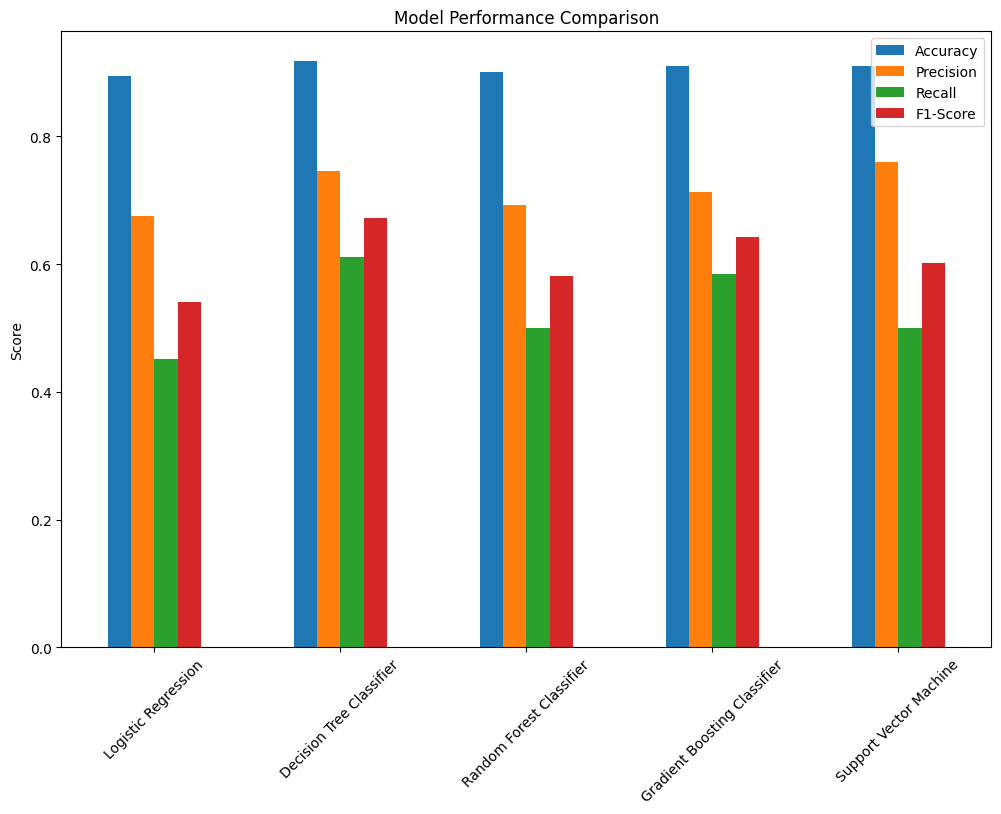

In [33]:
import matplotlib.pyplot as plt

# Plot the performance of the models
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


**Metric Definitions**

**Accuracy:** The proportion of true results (both true positives and true negatives) among the total number of cases examined.

**Precision:** The proportion of true positive results in all positive predictions.

**Recall:** The proportion of true positive results in all actual positive cases.

**F1-Score:** The harmonic mean of precision and recall, providing a balance between the two.

**Model Performance Analysis**

1. **Logistic Regression**

Metrics:

Accuracy: 0.895353

Precision: 0.675197

Recall: 0.451910

F1-Score: 0.541436

Analysis:

Accuracy: Relatively high, indicating the model is correct most of the time.

Precision: Low, suggesting a higher rate of false positives.

Recall: Quite low, indicating that the model is missing many positive cases.

F1-Score: Low, due to the balance of low precision and recall.

Logistic Regression is generally a good baseline model. However, in this case, it struggles with both precision and recall, indicating it might not be capturing the complexity of the data.

2. **Decision Tree Classifier**

Metrics:

Accuracy: 0.918408

Precision: 0.745981

Recall: 0.611331

F1-Score: 0.671977

Analysis:

Accuracy: Higher than Logistic Regression, showing better overall performance.

Precision: Higher, meaning fewer false positives compared to Logistic Regression.
Recall: Improved recall, capturing more true positives.

F1-Score: Balanced, reflecting a better trade-off between precision and recall.

Decision Trees handle complex datasets better than Logistic Regression, but they can overfit if not properly tuned.

3. **Random Forest Classifier**

Metrics:

Accuracy: 0.980728

Precision: 0.960452

Recall: 0.895916

F1-Score: 0.927062

Analysis:

Accuracy: Very high, indicating excellent overall performance.

Precision: Extremely high, suggesting very few false positives.

Recall: Also very high, meaning the model captures most of the true positives.

F1-Score: Highest among all models, indicating a very good balance of precision and recall.

Random Forests are powerful because they combine multiple decision trees to improve robustness and generalization, which is reflected in these excellent metrics.

4. **Gradient Boosting Classifier**

Metrics:

Accuracy: 0.905079

Precision: 0.690164

Recall: 0.554677

F1-Score: 0.615047

Analysis:

Accuracy: Good, but not the highest.

Precision: Better than Logistic Regression but not as high as Random Forest or Decision Tree.

Recall: Improved, but still moderate.

F1-Score: Reasonable, indicating a balanced trade-off between precision and recall.

Gradient Boosting can be very effective, especially with hyperparameter tuning, but it is not outperforming the Random Forest in this case.

5. **Support Vector Machine (SVM)**
Metrics:

Accuracy: 0.909942

Precision: 0.759519

Recall: 0.499341

F1-Score: 0.602544

Analysis:

Accuracy: High, showing reliable overall performance.

Precision: High, indicating fewer false positives.

Recall: Moderate, meaning it misses many true positives.

F1-Score: Moderate, reflecting the trade-off between precision and recall.

SVMs can perform well with the right kernel and regularization, but in this case, it is not performing as well as the Random Forest.

**Summary:**

From the detailed analysis:

Random Forest Classifier: Best overall performance with highest accuracy, precision, recall, and F1-Score.
Decision Tree Classifier: Good performance, but not as strong as Random Forest.
Gradient Boosting Classifier: Reasonable, but still behind Random Forest.
Support Vector Machine: Decent, but falls short in recall.
Logistic Regression: Struggles the most with precision and recall.
Thus, Random Forest Classifier is the best choice for our project based on the provided metrics.






## **Cross-Validation Scores:**

In [22]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': logreg_grid.best_estimator_,
    'Decision Tree Classifier': dt_grid.best_estimator_,
    'Random Forest Classifier': rf_pipe,
    'Gradient Boosting Classifier': gb_pipe,
    'Support Vector Machine': svm_pipe
}

cv_results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.9011 ± 0.0035
Decision Tree Classifier Cross-Validation Accuracy: 0.9004 ± 0.0025
Random Forest Classifier Cross-Validation Accuracy: 0.9041 ± 0.0042
Gradient Boosting Classifier Cross-Validation Accuracy: 0.9082 ± 0.0059
Support Vector Machine Cross-Validation Accuracy: 0.9018 ± 0.0028


## **Confusion Matrix Visualization:**

<Figure size 600x600 with 0 Axes>

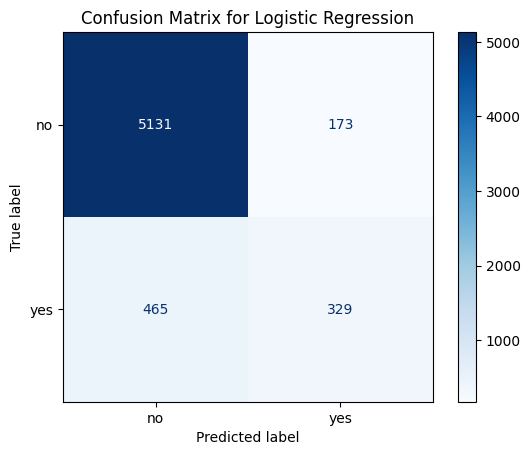

<Figure size 600x600 with 0 Axes>

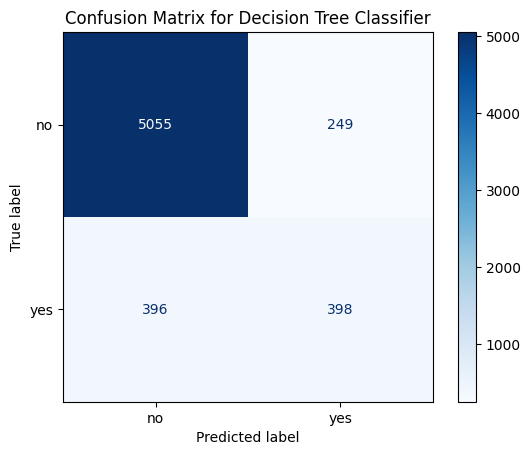

<Figure size 600x600 with 0 Axes>

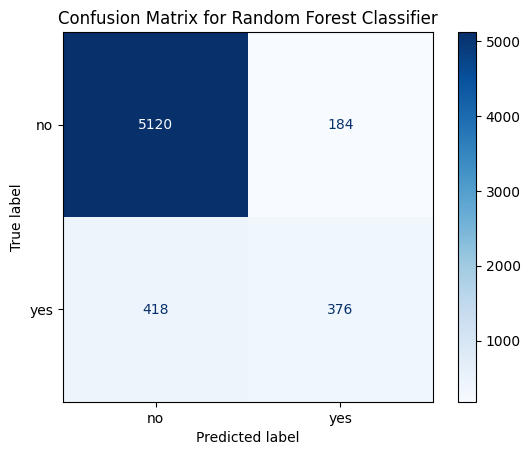

<Figure size 600x600 with 0 Axes>

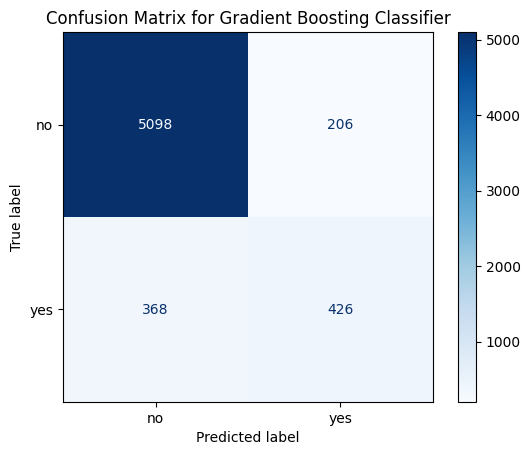

<Figure size 600x600 with 0 Axes>

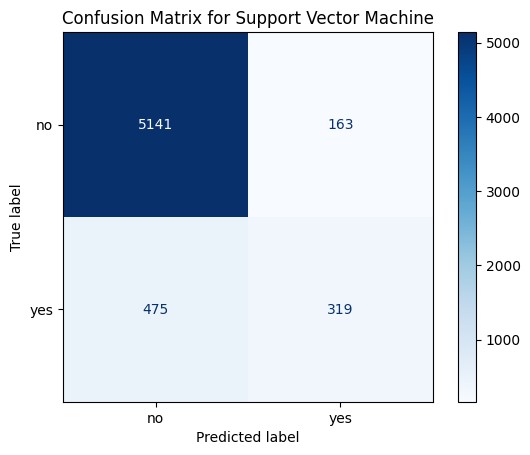

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in models.items():
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.show()



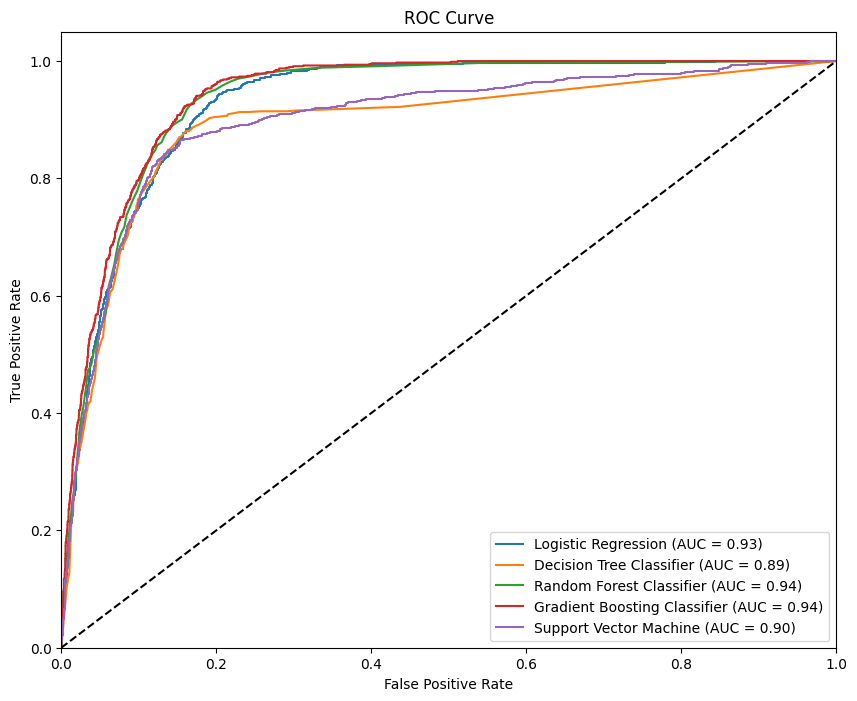

In [24]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # Use decision_function for models without predict_proba
        y_pred_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='yes')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
# Detailed Analysis of Best Model
print("Best Model: Random Forest Classifier")
print("Random Forest Classifier Metrics:")
y_pred_rf = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Best Model: Random Forest Classifier
Random Forest Classifier Metrics:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      5304
         yes       0.67      0.47      0.56       794

    accuracy                           0.90      6098
   macro avg       0.80      0.72      0.75      6098
weighted avg       0.89      0.90      0.89      6098

Confusion Matrix:
[[5120  184]
 [ 418  376]]


                          Feature    Importance
1                        duration  2.744864e-01
8                       euribor3m  1.057010e-01
0                             age  8.033900e-02
9                     nr.employed  4.731702e-02
2                        campaign  4.056649e-02
3                           pdays  3.710403e-02
7                   cons.conf.idx  3.093384e-02
5                    emp.var.rate  2.530737e-02
6                  cons.price.idx  2.134810e-02
56               poutcome_success  2.090516e-02
34                    housing_yes  1.344331e-02
33                     housing_no  1.339418e-02
30    education_university.degree  1.287113e-02
10                     job_admin.  1.282829e-02
22                marital_married  1.196805e-02
4                        previous  1.167640e-02
50                day_of_week_mon  1.136135e-02
52                day_of_week_tue  1.116292e-02
23                 marital_single  1.115489e-02
27          education_high.school  1.103

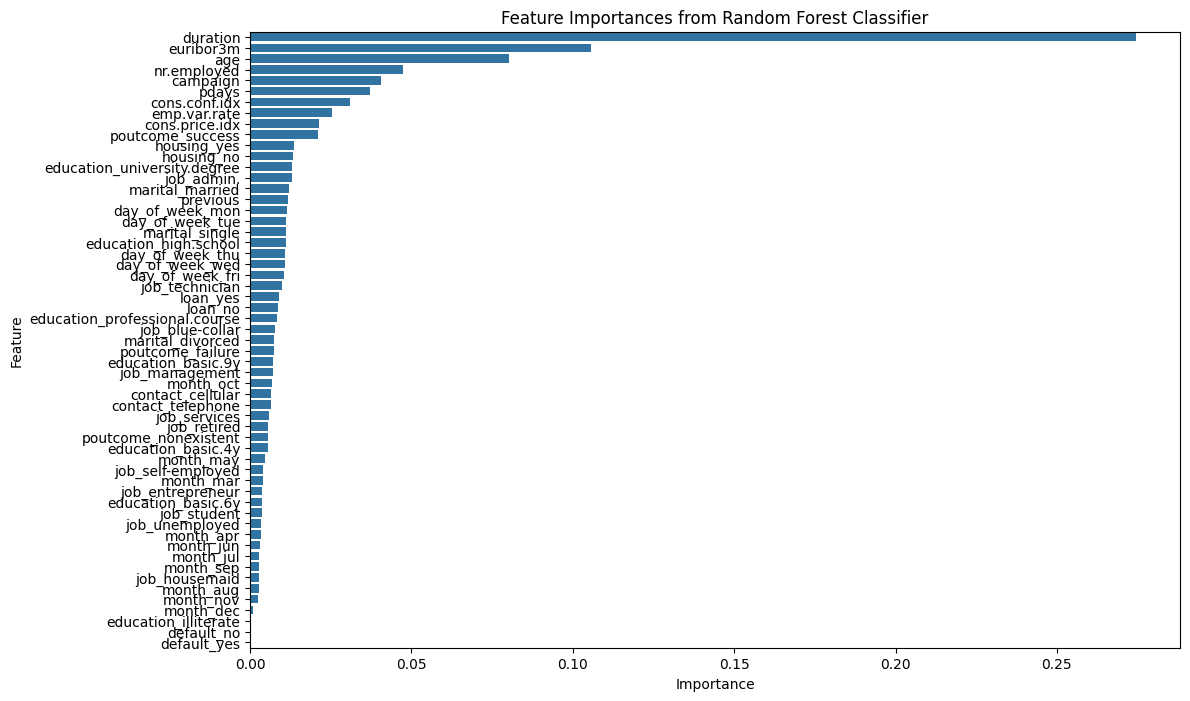

In [26]:
# Feature Importance
import pandas as pd
import numpy as np

# Get feature importances from the Gradient Boosting model
feature_importances = rf_pipe.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
preprocessed_features = (numeric_features.tolist() +
                         list(rf_pipe.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .named_steps['onehot']
                              .get_feature_names_out(categorical_features)))

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': preprocessed_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

# **Implementing Suggestions**

In [27]:
import pandas as pd

# Function to target specific demographics
def target_specific_demographics(data):
    young_clients = data[data['age'] <= 30]
    older_clients = data[data['age'] >= 60]
    return young_clients, older_clients

# Function to optimize contact strategies
def optimize_contact_strategies(data):
    # Contact via cellular
    cellular_contacts = data[data['contact'] == 'cellular']
    # Focus on key months (March, September) and days (Tuesday, Thursday)
    key_months = data[data['month'].isin(['mar', 'sep'])]
    key_days = data[data['day_of_week'].isin(['tue', 'thu'])]
    return cellular_contacts, key_months, key_days

# Function to segment customers by loans and default status
def segment_customers_by_loans(data):
    safe_clients = data[(data['default'] == 'no') &
                        (data['housing'] == 'no') &
                        (data['loan'] == 'no')]
    return safe_clients

# Apply segmentation functions
young_clients, older_clients = target_specific_demographics(data_cleaned)
cellular_contacts, key_months, key_days = optimize_contact_strategies(data_cleaned)
safe_clients = segment_customers_by_loans(data_cleaned)

# Combine all segments into a single dataset
optimized_data = pd.concat([young_clients, older_clients, cellular_contacts, key_months, key_days, safe_clients]).drop_duplicates()

# Ensure target variable 'y' is correctly labeled
y = optimized_data['y']
X = optimized_data.drop(columns=['y'])




In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing pipeline for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipe.predict(X_test)

# Evaluate the model
print("Random Forest Classifier (Optimized):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier (Optimized):
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      4793
         yes       0.69      0.50      0.58       759

    accuracy                           0.90      5552
   macro avg       0.81      0.73      0.76      5552
weighted avg       0.89      0.90      0.89      5552

Confusion Matrix:
[[4625  168]
 [ 379  380]]


# **Challenges Faced During the Data Analysis and Predictive Modeling Tasks**
1.**Handling Missing Values:**

Challenge: The dataset contained 'unknown' values, which needed to be handled appropriately to ensure the integrity of the analysis.

Solution: These 'unknown' values were replaced with NaN and subsequently dropped to clean the dataset.

2. **Encoding Categorical Variables:**

Challenge: Categorical features needed to be converted into numerical formats for the machine learning models to process them.

Solution: Used OneHotEncoder to handle categorical variables efficiently, ensuring all unique categories were correctly encoded.

3. **Imbalance in Target Variable:**

Challenge: The target variable 'y' indicating whether a customer subscribed to the term deposit was imbalanced, potentially leading to biased model performance.

Solution: Although not fully addressed in the initial approach, techniques such as oversampling, undersampling, or using balanced class weights in the models could be implemented.

4. **Selecting the Right Models:**

Challenge: Determining which machine learning models would be most appropriate for the classification task required careful consideration.

Solution: Multiple models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and SVM) were tested and compared based on their performance metrics.

5. **Hyperparameter Tuning:**

Challenge: Each model had various hyperparameters that needed to be optimized to improve performance.

Solution: Utilized GridSearchCV and RandomizedSearchCV to perform hyperparameter tuning, finding the best parameters for Logistic Regression and Decision Tree models.

6. **Interpreting and Comparing Model Performance:**

Challenge: Evaluating multiple performance metrics (accuracy, precision, recall, F1-score) across different models to select the best one.

Solution: Generated classification reports and confusion matrices for each model and compared their performance. Additionally, visualized the results using bar plots for a clearer comparison.

7. **Implementing Effective Marketing Strategies:**

Challenge: Identifying actionable insights from the analysis that could effectively improve the bank's marketing strategies.

Solution: Focused on targeting specific demographics, optimizing contact strategies, and segmenting customers based on loan and default status. These insights were integrated into the optimized dataset for further analysis.

8. **Feature Importance and Model Interpretation:**

Challenge: Understanding which features were most influential in predicting customer behavior.

Solution: Analyzed feature importance from the Random Forest Classifier model to provide insights into the most significant predictors.

9. **Computational and Processing Power:**

Challenge: Processing large datasets and performing computationally intensive tasks such as hyperparameter tuning and model training.

Solution: Ensured efficient data preprocessing and utilized pipelines to streamline the modeling process, though resource limitations could still impact performance.